# Part 1- Density based clustering using DBSCAN on a 2-Dimensional Data

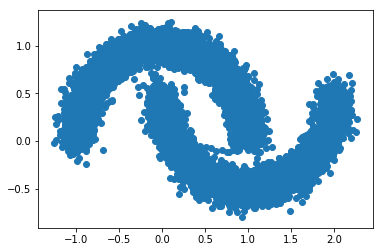

In [30]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

data = make_moons(n_samples=10000, noise=0.09)
data = data[0]

plt.scatter(data[0:,0:1], data[0:,1:2])
plt.show()

### Finding eplison and min_samples

    - As a thumb of rule we can take min_samples as 2*D (where D is the dimension of data). If D=2 then take min_samples=3
    - To calculate epsilon we can do the following
        - Find the average of distances of each point to it's k-nearest neighbours where we take k as min_samples
        - Use NearestNeighbour class for thi
        - Plot a graph of k-neighbour distance and the indices of data point
        - Choose a distance after which the distance changes dramatically.
        - that's a good point for eplison

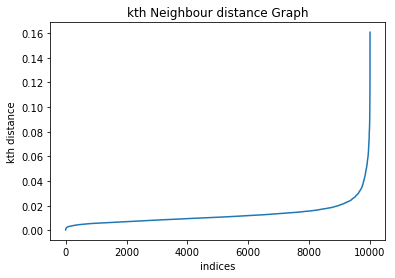

(10000,)


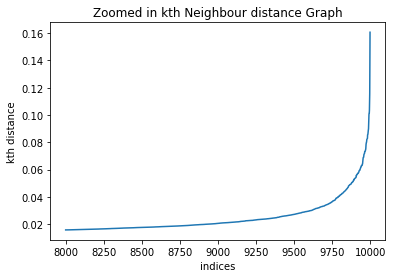

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 3 #since data dimension is 2

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(data)
distances, indices = nn.kneighbors(data)

d = np.sort(distances[:,-1])
i = indices[:,0]

# Plot graph of indices and distances
plt.plot(i,d)
plt.xlabel('indices')
plt.ylabel('kth distance')
plt.title('kth Neighbour distance Graph')
plt.show()

print (i.shape)
# Once we have a sense of some optimal value of k-th neighbour's distance we can zoom in a bit into the graph. For e.g.
# in this example the optimal value seems to be around 0.2 and 0.4; so we zoom in a bit
plt.plot(i[8000:],d[8000:])
plt.xlabel('indices')
plt.ylabel('kth distance')
plt.title('Zoomed in kth Neighbour distance Graph')
plt.show()

### Defining DBSCAN Model

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.04, min_samples=min_samples)
model = dbscan.fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.04, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)


### Clustering Graph with Outliers

    - Plot clusters and mark outliers as green colored stars

Number of outliers = 159


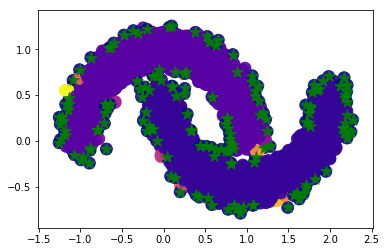

In [34]:
df = pd.DataFrame(data=data, columns=['X1','X2'])
df['labels'] = model.labels_

df_outliers = df[df['labels']==-1]
print ('Number of outliers =', df_outliers.shape[0])
plt.scatter(data[:,0], data[:,1], c=model.labels_, s=140, alpha=0.9, cmap="plasma")
plt.scatter(df_outliers['X1'], df_outliers['X2'], c='g', marker='*', s=140, alpha=0.9, cmap="plasma")
plt.show()

# Part 2- Density based clustering using DBSCAN on a N-Dimensional Data (N>2)

In [45]:
from sklearn.datasets import load_boston

data = load_boston()
bostonData = data.data
print ('Shape of data is %d dimension'%(bostonData.shape[1]))

Shape of data is 13 dimension


### Finding eplison and min_samples

(506,)
[ 11.57381146  11.85401779  11.93135083  11.99488069  12.01390176
  12.22914109  12.27791448  12.33298092  12.52970889  12.5865244
  12.84075886  12.86622992  13.11130648  13.40271864  13.41544702
  13.4169811   13.42558888  13.4362673   13.90847716  13.97095913
  14.14802345  14.28065781  14.41324194  14.48603983  14.8199784
  14.92776909  15.06878745  15.2778112   15.67496857  15.7034346
  15.93687575  16.15736732  16.27358715  16.28778123  16.28825682
  16.38190121  16.47752082  16.58451421  16.75359531  16.81466839
  17.02229935  17.02925954  17.31694601  17.32232058  17.42068591
  17.43508554  17.48282198  17.54945901  17.64842257  17.66232767
  17.68476902  17.96533059  18.04825772  18.11711412  18.25359908
  18.2541445   18.26099057  18.40620362  18.48583059  18.51354066
  18.52397728  18.60354628  18.76329667  18.82644128  18.92263391
  19.19986444  19.20424799  19.25105234  19.31673478  19.45951957
  19.52211725  19.6855286   19.95113874  20.22218542  20.37773207
  20.4

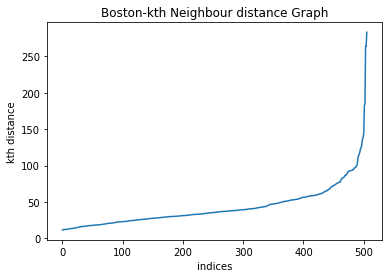

(506,)


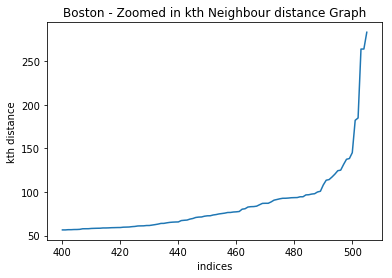

In [49]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples =  bostonData.shape[1]*2

nnBoston = NearestNeighbors(n_neighbors=min_samples)
nnBoston.fit(bostonData)
distancesBoston, indicesBoston = nnBoston.kneighbors(bostonData)

dBoston = np.sort(distancesBoston[:,-1])
iBoston = indicesBoston[:,0]

print (dBoston.shape)
print (dBoston)
print (iBoston.shape)
# Plot graph of indices and distances
plt.plot(iBoston,dBoston)
plt.xlabel('indices')
plt.ylabel('kth distance')
plt.title('Boston-kth Neighbour distance Graph')
plt.show()

print (iBoston.shape)
# Once we have a sense of some optimal value of k-th neighbour's distance we can zoom in a bit into the graph. For e.g.
# in this example the optimal value seems to be around 0.2 and 0.4; so we zoom in a bit
plt.plot(iBoston[400:],dBoston[400:])
plt.xlabel('indices')
plt.ylabel('kth distance')
plt.title('Boston - Zoomed in kth Neighbour distance Graph')
plt.show()